# Titanic

The dataset that we will work with in this exercise contains data on the passengers onboard Titanic when it sank on its maiden voyage. Our objective is to build a model that takes in basic information about a passenger and outputs whether the passenger survived or not.

We have the following data on each of the passengers:

Variable	| Definition	| Key
--- | --- | ---
survival	| Survival |	0 = No, 1 = Yes
pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex	
Age	| Age in years	
sibsp	| number of siblings / spouses aboard the Titanic	
parch	| number of parents / children aboard the Titanic	
ticket	| Ticket number	
fare	| Passenger fare	
cabin	| Cabin number	
embarked	| Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton


The dataset is used for teaching machine learning for example at [Kaggle](https://www.kaggle.com/c/titanic/overview)

In [13]:
!wget https://storage.googleapis.com/machine-learning-course-datasets/titanic/train.csv -O /tmp/train.csv

--2019-05-31 18:48:17--  https://storage.googleapis.com/machine-learning-course-datasets/titanic/train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘/tmp/train.csv’

/tmp/train.csv      100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2019-05-31 18:48:18 (79.5 MB/s) - ‘/tmp/train.csv’ saved [61194/61194]



In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("/tmp/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering

Below we train a decision tree on only the **SibSp** column. The model has an accuracy of about 65%, but this can be improved with feature engineering. See if you can increase the accuracy, by adding other columns. You only need to change the first cell.

In [0]:
columns=["SibSp"]

In [11]:
from sklearn import tree


X=data[columns]
y=np.array(data[["Survived"]]).flatten()

# We split the dataset into a train and a test set. 
# This will give us a better estimate of how the model performs.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = tree.DecisionTreeClassifier(max_depth=2)

classifier.fit(X_train, y_train)

sum(classifier.predict(X_test) == np.array(y_test))/len(y_test)


0.6457399103139013

[Text(167.4, 181.2, 'X[0] <= 2.5\nentropy = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.48\nsamples = 634\nvalue = [381, 253]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.456\nsamples = 458\nvalue = [297, 161]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.499\nsamples = 176\nvalue = [84, 92]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 4.5\nentropy = 0.251\nsamples = 34\nvalue = [29, 5]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]')]

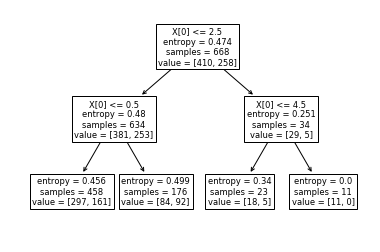

In [12]:
tree.plot_tree(classifier)